In [1]:
import os
import pathlib
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from IPython.display import display
from sklearn.utils import shuffle
import warnings
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


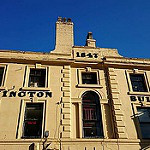

In [2]:
src_img = Image.open('/content/drive/MyDrive/Selected Project/Intel Image Dataset/seg_train/seg_train/buildings/7570.jpg')
display(src_img)

In [3]:
np.array(src_img).shape

(150, 150, 3)

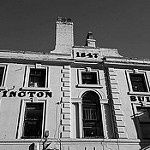

In [5]:
gray_img = ImageOps.grayscale(src_img)
display(gray_img)

In [6]:
np.array(gray_img).shape

(150, 150)

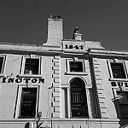

In [8]:
gray_resized_img = gray_img.resize(size=(128, 128))
display(gray_resized_img)

In [9]:
np.array(gray_resized_img).shape

(128, 128)

In [11]:
np.ravel(gray_resized_img)

array([ 51,  51,  51, ..., 181, 192, 186], dtype=uint8)

In [12]:
img_final = np.ravel(gray_resized_img) / 255.0

In [13]:
img_final

array([0.2       , 0.2       , 0.2       , ..., 0.70980392, 0.75294118,
       0.72941176])

In [14]:
def process_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(128, 128))
    img = np.ravel(img) / 255.0
    return img

In [15]:
tst_img = process_image(img_path='/content/drive/MyDrive/Selected Project/Intel Image Dataset/seg_train/seg_train/buildings/7570.jpg')

In [16]:
tst_img

array([0.2       , 0.2       , 0.2       , ..., 0.70980392, 0.75294118,
       0.72941176])

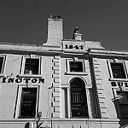

In [17]:
Image.fromarray(np.uint8(tst_img * 255).reshape((128, 128)))

In [18]:
def process_folder(folder: pathlib.PosixPath) -> pd.DataFrame:
    # We'll store the images here
    processed = []
    
    # For every image in the directory
    for img in folder.iterdir():
        # Ensure JPG
        if img.suffix == '.jpg':
            # Two images failed for whatever reason, so let's just ignore them
            try:
                processed.append(process_image(img_path=str(img)))
            except Exception as _:
                continue
           
    # Convert to pd.DataFrame
    processed = pd.DataFrame(processed)
    processed['class'] = folder.parts[-1]
    
    return processed

In [19]:
%%time

train_build = process_folder(folder=pathlib.Path.cwd().joinpath('/content/drive/MyDrive/Selected Project/Intel Image Dataset/seg_train/seg_train/buildings'))
train_forest = process_folder(folder=pathlib.Path.cwd().joinpath('/content/drive/MyDrive/Selected Project/Intel Image Dataset/seg_train/seg_train/forest'))

train_set = pd.concat([train_build, train_forest], axis=0)

with open('train_set.pkl', 'wb') as f:
    pickle.dump(train_set, f)

CPU times: user 34.3 s, sys: 4.83 s, total: 39.1 s
Wall time: 1min 19s


In [20]:
train_set.shape

(3760, 16385)

In [21]:
%%time

test_build = process_folder(folder=pathlib.Path.cwd().joinpath('/content/drive/MyDrive/Selected Project/Intel Image Dataset/seg_test/seg_test/buildings'))
test_forest = process_folder(folder=pathlib.Path.cwd().joinpath('/content/drive/MyDrive/Selected Project/Intel Image Dataset/seg_test/seg_test/forest'))

test_set = pd.concat([test_build, test_forest], axis=0)

with open('test_set.pkl', 'wb') as f:
    pickle.dump(test_set, f)

CPU times: user 5.65 s, sys: 336 ms, total: 5.99 s
Wall time: 11.5 s


In [22]:
test_set.shape

(538, 16385)

In [23]:
%%time

valid_build = process_folder(folder=pathlib.Path.cwd().joinpath('/content/drive/MyDrive/Selected Project/Intel Image Dataset/seg_valid/seg_valid/buildings'))
valid_forest = process_folder(folder=pathlib.Path.cwd().joinpath('/content/drive/MyDrive/Selected Project/Intel Image Dataset/seg_valid/seg_valid/forest'))

valid_set = pd.concat([valid_build, valid_forest], axis=0)

with open('valid_set.pkl', 'wb') as f:
    pickle.dump(valid_set, f)

CPU times: user 11.3 s, sys: 1.46 s, total: 12.8 s
Wall time: 24.8 s


In [24]:
valid_set.shape

(1075, 16385)

In [25]:
train_set = shuffle(train_set).reset_index(drop=True)
test_set = shuffle(train_set).reset_index(drop=True)
valid_set = shuffle(valid_set).reset_index(drop=True)

In [26]:
train_set.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383,class
0,0.592157,0.592157,0.588235,0.588235,0.584314,0.584314,0.584314,0.580392,0.580392,0.580392,0.576471,0.576471,0.572549,0.572549,0.572549,0.568627,0.568627,0.568627,0.564706,0.564706,0.560784,0.556863,0.556863,0.560784,0.560784,0.552941,0.545098,0.549020,0.549020,0.545098,0.545098,0.545098,0.541176,0.541176,0.541176,0.537255,0.533333,0.529412,0.529412,0.533333,...,0.388235,0.427451,0.435294,0.439216,0.458824,0.482353,0.454902,0.454902,0.486275,0.486275,0.427451,0.427451,0.435294,0.458824,0.490196,0.470588,0.486275,0.458824,0.439216,0.470588,0.466667,0.435294,0.423529,0.376471,0.431373,0.423529,0.439216,0.411765,0.411765,0.415686,0.427451,0.400000,0.435294,0.415686,0.380392,0.368627,0.392157,0.419608,0.435294,buildings
1,0.094118,0.078431,0.074510,0.078431,0.054902,0.062745,0.094118,0.070588,0.070588,0.101961,0.113725,0.105882,0.086275,0.039216,0.039216,0.050980,0.098039,0.082353,0.090196,0.058824,0.086275,0.086275,0.117647,0.101961,0.098039,0.074510,0.082353,0.125490,0.109804,0.101961,0.090196,0.149020,0.125490,0.070588,0.066667,0.101961,0.094118,0.129412,0.109804,0.082353,...,0.035294,0.078431,0.137255,0.101961,0.176471,0.117647,0.113725,0.105882,0.070588,0.086275,0.090196,0.050980,0.054902,0.019608,0.043137,0.058824,0.031373,0.086275,0.058824,0.086275,0.074510,0.078431,0.200000,0.113725,0.054902,0.066667,0.129412,0.317647,0.400000,0.368627,0.396078,0.231373,0.164706,0.101961,0.133333,0.062745,0.094118,0.094118,0.094118,forest
2,0.803922,0.807843,0.807843,0.807843,0.807843,0.803922,0.800000,0.803922,0.803922,0.803922,0.800000,0.800000,0.800000,0.803922,0.803922,0.776471,0.796078,0.788235,0.788235,0.894118,0.549020,0.192157,0.713725,0.819608,0.768627,0.784314,0.784314,0.780392,0.776471,0.776471,0.776471,0.776471,0.776471,0.772549,0.764706,0.768627,0.768627,0.772549,0.768627,0.764706,...,0.541176,0.360784,0.105882,0.086275,0.105882,0.082353,0.090196,0.058824,0.086275,0.196078,0.247059,0.011765,0.054902,0.023529,0.007843,0.078431,0.007843,0.000000,0.133333,0.223529,0.023529,0.023529,0.035294,0.058824,0.152941,0.250980,0.419608,0.631373,0.788235,0.682353,0.607843,0.239216,0.184314,0.133333,0.043137,0.141176,0.215686,0.121569,0.043137,buildings
3,0.129412,0.129412,0.133333,0.125490,0.113725,0.105882,0.098039,0.098039,0.109804,0.109804,0.105882,0.101961,0.105882,0.105882,0.105882,0.098039,0.098039,0.094118,0.098039,0.098039,0.098039,0.098039,0.098039,0.098039,0.098039,0.098039,0.098039,0.101961,0.105882,0.105882,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,0.101961,...,0.117647,0.113725,0.117647,0.133333,0.137255,0.125490,0.101961,0.098039,0.094118,0.098039,0.105882,0.086275,0.098039,0.101961,0.117647,0.086275,0.098039,0.101961,0.105882,0.101961,0.098039,0.098039,0.094118,0.109804,0.094118,0.101961,0.086275,0.101961,0.101961,0.105882,0.113725,0.117647,0.109804,0.105882,0.098039,0.094118,0.094118,0.090196,0.086275,buildings
4,0.537255,0.486275,0.513725,0.529412,0.380392,0.545098,0.639216,0.435294,0.423529,0.556863,0.603922,0.415686,0.662745,0.509804,0.301961,0.682353,0.549020,0.615686,0.603922,0.545098,0.345098,0.529412,0.588235,0.545098,0.454902,0.619608,0.619608,0.639216,0.509804,0.549020,0.572549,0.356863,0.392157,0.549020,0.368627,0.435294,0.705882,0.533333,0.498039,0.678431,...,0.054902,0.235294,0.443137,0.317647,0.376471,0.149020,0.372549,0.466667,0.670588,0.270588,0.274510,0.364706,0.235294,0.129412,0.090196,0.090196,0.290196,0.058824,0.145098,0.086275,0.074510,0.062745,0.105882,0.121569,0.074510,0.098039,0.121569,0.047059,0.043137,0.015686,0.168627,0.188235,0.090196,0.101961,0.031373,0.066667,0.066667,0.050980,0.027451,forest
5,0.337255,0.678

In [27]:
test_set.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383,class
0,0.654902,0.647059,0.658824,0.666667,0.654902,0.658824,0.666667,0.654902,0.674510,0.686275,0.678431,0.662745,0.674510,0.686275,0.682353,0.674510,0.670588,0.674510,0.678431,0.674510,0.678431,0.678431,0.694118,0.694118,0.670588,0.682353,0.686275,0.682353,0.674510,0.670588,0.682353,0.690196,0.678431,0.654902,0.654902,0.666667,0.678431,0.682353,0.674510,0.674510,...,0.552941,0.541176,0.525490,0.556863,0.556863,0.521569,0.541176,0.513725,0.533333,0.537255,0.521569,0.549020,0.533333,0.513725,0.537255,0.549020,0.517647,0.513725,0.533333,0.513725,0.505882,0.525490,0.517647,0.509804,0.490196,0.501961,0.525490,0.505882,0.509804,0.498039,0.498039,0.521569,0.513725,0.509804,0.521569,0.505882,0.509804,0.505882,0.490196,buildings
1,0.384314,0.380392,0.388235,0.384314,0.392157,0.439216,0.450980,0.439216,0.517647,0.509804,0.494118,0.443137,0.439216,0.454902,0.454902,0.431373,0.403922,0.388235,0.392157,0.380392,0.384314,0.388235,0.384314,0.384314,0.384314,0.380392,0.384314,0.384314,0.384314,0.380392,0.380392,0.384314,0.388235,0.388235,0.388235,0.388235,0.384314,0.384314,0.384314,0.384314,...,0.372549,0.533333,0.427451,0.239216,0.325490,0.325490,0.325490,0.345098,0.352941,0.356863,0.376471,0.384314,0.403922,0.368627,0.349020,0.364706,0.368627,0.380392,0.419608,0.388235,0.376471,0.376471,0.376471,0.384314,0.384314,0.454902,0.380392,0.388235,0.400000,0.392157,0.400000,0.396078,0.419608,0.490196,0.411765,0.403922,0.407843,0.419608,0.423529,buildings
2,0.164706,0.090196,0.494118,0.882353,0.819608,0.529412,0.282353,0.223529,0.109804,0.164706,0.286275,0.329412,0.368627,0.262745,0.258824,0.247059,0.305882,0.345098,0.219608,0.349020,0.337255,0.325490,0.294118,0.337255,0.341176,0.262745,0.196078,0.290196,0.352941,0.435294,0.407843,0.337255,0.254902,0.294118,0.301961,0.352941,0.643137,0.521569,0.501961,0.623529,...,0.333333,0.337255,0.360784,0.325490,0.380392,0.325490,0.368627,0.494118,0.380392,0.415686,0.498039,0.498039,0.541176,0.474510,0.478431,0.470588,0.447059,0.462745,0.474510,0.454902,0.364706,0.454902,0.549020,0.462745,0.478431,0.486275,0.486275,0.482353,0.529412,0.435294,0.427451,0.447059,0.658824,0.486275,0.521569,0.458824,0.419608,0.447059,0.317647,forest
3,0.603922,0.603922,0.603922,0.600000,0.600000,0.600000,0.596078,0.600000,0.600000,0.600000,0.600000,0.600000,0.596078,0.592157,0.588235,0.588235,0.588235,0.588235,0.588235,0.588235,0.588235,0.588235,0.592157,0.588235,0.588235,0.584314,0.584314,0.584314,0.584314,0.584314,0.588235,0.588235,0.588235,0.588235,0.584314,0.584314,0.584314,0.584314,0.580392,0.580392,...,0.137255,0.141176,0.145098,0.129412,0.129412,0.145098,0.117647,0.105882,0.168627,0.215686,0.172549,0.160784,0.129412,0.145098,0.145098,0.164706,0.164706,0.141176,0.149020,0.137255,0.125490,0.121569,0.137255,0.141176,0.164706,0.149020,0.129412,0.137255,0.125490,0.129412,0.125490,0.113725,0.129412,0.133333,0.141176,0.125490,0.137255,0.129412,0.113725,buildings
4,0.309804,0.278431,0.247059,0.254902,0.254902,0.223529,0.203922,0.207843,0.247059,0.290196,0.282353,0.235294,0.211765,0.215686,0.211765,0.203922,0.203922,0.207843,0.211765,0.211765,0.207843,0.219608,0.207843,0.211765,0.200000,0.227451,0.250980,0.258824,0.301961,0.298039,0.270588,0.282353,0.266667,0.227451,0.231373,0.219608,0.231373,0.250980,0.239216,0.301961,...,0.305882,0.317647,0.333333,0.337255,0.325490,0.313725,0.309804,0.298039,0.278431,0.262745,0.278431,0.270588,0.254902,0.384314,0.247059,0.015686,0.039216,0.141176,0.007843,0.203922,0.341176,0.556863,0.419608,0.247059,0.713725,0.627451,0.643137,0.705882,0.647059,0.662745,0.713725,0.549020,0.415686,0.517647,0.709804,0.713725,0.658824,0.654902,0.698039,buildings
5,0.360784,0.

In [28]:
valid_set.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383,class
0,0.101961,0.290196,0.400000,0.305882,0.274510,0.160784,0.380392,0.313725,0.329412,0.274510,0.180392,0.407843,0.282353,0.258824,0.250980,0.172549,0.454902,0.529412,0.466667,0.643137,0.564706,0.356863,0.156863,0.478431,0.619608,0.462745,0.313725,0.235294,0.168627,0.662745,0.313725,0.239216,0.352941,0.431373,0.250980,0.290196,0.250980,0.231373,0.243137,0.294118,...,0.494118,0.482353,0.443137,0.513725,0.427451,0.266667,0.262745,0.274510,0.580392,0.827451,0.447059,0.250980,0.505882,0.396078,0.631373,0.749020,0.647059,0.725490,0.776471,0.666667,0.635294,0.654902,0.439216,0.309804,0.482353,0.462745,0.560784,0.545098,0.564706,0.600000,0.623529,0.607843,0.600000,0.443137,0.533333,0.403922,0.321569,0.196078,0.129412,forest
1,0.258824,0.062745,0.250980,0.188235,0.133333,0.105882,0.062745,0.098039,0.082353,0.086275,0.090196,0.184314,0.254902,0.156863,0.180392,0.164706,0.223529,0.215686,0.231373,0.309804,0.270588,0.168627,0.219608,0.180392,0.196078,0.156863,0.101961,0.184314,0.164706,0.125490,0.239216,0.862745,0.713725,0.690196,0.364706,0.545098,0.411765,0.403922,0.525490,0.427451,...,0.317647,0.388235,0.388235,0.368627,0.384314,0.403922,0.286275,0.282353,0.223529,0.258824,0.247059,0.337255,0.345098,0.349020,0.250980,0.443137,0.345098,0.317647,0.360784,0.360784,0.286275,0.372549,0.360784,0.360784,0.376471,0.294118,0.388235,0.560784,0.537255,0.411765,0.447059,0.407843,0.431373,0.486275,0.466667,0.427451,0.403922,0.376471,0.443137,forest
2,0.290196,0.415686,0.662745,0.482353,0.384314,0.478431,0.364706,0.160784,0.074510,0.082353,0.058824,0.019608,0.086275,0.090196,0.054902,0.090196,0.137255,0.215686,0.352941,0.596078,0.635294,0.725490,0.600000,0.568627,0.537255,0.494118,0.341176,0.168627,0.113725,0.094118,0.105882,0.200000,0.086275,0.054902,0.094118,0.200000,0.105882,0.286275,0.470588,0.521569,...,0.525490,0.584314,0.596078,0.596078,0.556863,0.552941,0.576471,0.592157,0.572549,0.556863,0.572549,0.627451,0.611765,0.627451,0.588235,0.568627,0.568627,0.537255,0.494118,0.513725,0.462745,0.513725,0.600000,0.647059,0.298039,0.000000,0.066667,0.070588,0.035294,0.345098,0.588235,0.580392,0.611765,0.588235,0.572549,0.513725,0.462745,0.219608,0.160784,buildings
3,0.262745,0.349020,0.490196,0.274510,0.113725,0.145098,0.176471,0.227451,0.262745,0.349020,0.388235,0.360784,0.282353,0.054902,0.160784,0.541176,0.619608,0.635294,0.635294,0.658824,0.556863,0.690196,0.180392,0.521569,0.478431,0.376471,0.325490,0.321569,0.392157,0.678431,0.411765,0.466667,0.721569,0.545098,0.611765,0.631373,0.482353,0.482353,0.498039,0.380392,...,0.447059,0.317647,0.443137,0.600000,0.164706,0.454902,0.407843,0.290196,0.305882,0.494118,0.447059,0.568627,0.501961,0.403922,0.192157,0.294118,0.568627,0.443137,0.458824,0.305882,0.309804,0.501961,0.345098,0.431373,0.458824,0.341176,0.407843,0.317647,0.286275,0.282353,0.152941,0.254902,0.352941,0.352941,0.478431,0.505882,0.474510,0.509804,0.501961,forest
4,0.219608,0.329412,0.313725,0.219608,0.105882,0.035294,0.094118,0.176471,0.243137,0.172549,0.192157,0.188235,0.313725,0.450980,0.541176,0.372549,0.152941,0.415686,0.274510,0.192157,0.215686,0.141176,0.219608,0.200000,0.203922,0.380392,0.180392,0.290196,0.368627,0.447059,0.403922,0.403922,0.462745,0.431373,0.392157,0.478431,0.823529,0.525490,0.588235,0.666667,...,0.239216,0.247059,0.239216,0.215686,0.243137,0.219608,0.227451,0.219608,0.223529,0.219608,0.223529,0.211765,0.211765,0.196078,0.172549,0.215686,0.149020,0.133333,0.152941,0.133333,0.145098,0.164706,0.137255,0.129412,0.141176,0.062745,0.043137,0.082353,0.121569,0.050980,0.094118,0.168627,0.141176,0.145098,0.137255,0.156863,0.141176,0.117647,0.145098,forest
5,0.070588,0.047059,0.

In [29]:
x_train = train_set.drop('class', axis=1)
x_train = np.array(x_train)
y_train = train_set['class']

x_test = test_set.drop('class', axis=1)
x_test = np.array(x_test)
y_test = test_set['class']

x_valid = valid_set.drop('class', axis=1)
x_vaild = np.array(x_valid)
y_valid = valid_set['class']

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_valid = le.fit_transform(y_valid)

In [31]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [32]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
history = ann.fit(x_train, y_train, batch_size =56, epochs = 100)

Epoch 1/100
68/68 [==============================] - 2s 6ms/step - loss: 0.7782 - accuracy: 0.5670
Epoch 2/100
68/68 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6261
Epoch 3/100
68/68 [==============================] - 0s 6ms/step - loss: 0.6352 - accuracy: 0.6375
Epoch 4/100
68/68 [==============================] - 0s 5ms/step - loss: 0.6117 - accuracy: 0.6569
Epoch 5/100
68/68 [==============================] - 0s 5ms/step - loss: 0.5769 - accuracy: 0.6979
Epoch 6/100
68/68 [==============================] - 0s 6ms/step - loss: 0.5648 - accuracy: 0.7112
Epoch 7/100
68/68 [==============================] - 0s 6ms/step - loss: 0.5554 - accuracy: 0.7194
Epoch 8/100
68/68 [==============================] - 0s 5ms/step - loss: 0.5545 - accuracy: 0.7141
Epoch 9/100
68/68 [==============================] - 0s 5ms/step - loss: 0.5331 - accuracy: 0.7420
Epoch 10/100
68/68 [==============================] - 0s 6ms/step - loss: 0.5082 - accuracy: 0.7620
Epoch 11/

In [34]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1808   31]
 [  24 1897]]


0.9853723404255319

In [36]:
test_loss, test_acc = ann.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

118/118 - 0s - loss: 0.0637 - accuracy: 0.9854 - 500ms/epoch - 4ms/step

Test accuracy: 0.9853723645210266


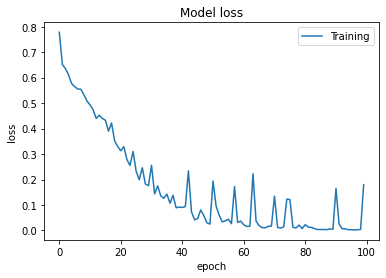

In [37]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training'], loc='upper right')
plt.show()

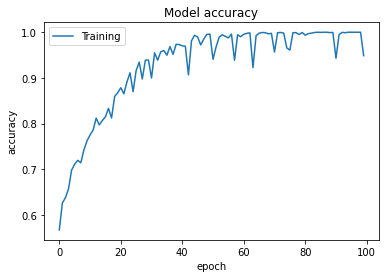

In [38]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training'], loc='upper left')
plt.show()

<function matplotlib.pyplot.show>

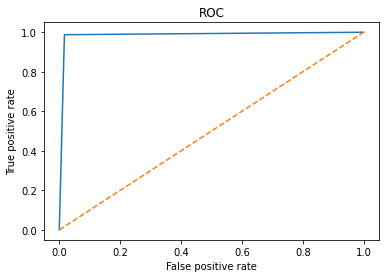

In [39]:
from sklearn.metrics import roc_curve
fpr,tpr ,thresholds =roc_curve(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.title('ROC')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,tpr,linestyle='-')
plt.plot([0,1],[0,1],linestyle='--')
plt.show